## Taylor Series and Finite-Difference Approximations

In [ ]:
#Imports and global utilities
!pip install sympy

import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from dataclasses import dataclass

sp.init_printing()

#helper functions
def abs_error(true_val, approx_val):
	return float(abs(sp.N(true_val)-sp.N(approx_val)))

def truepercent_relative(true_val, approx_val):
    actualVal=float(sp.N(true_val))
    estimatedVal=float(sp.N(approx_val))
    
    difference=abs(actualVal-estimatedVal)
    
    if actualVal != 0:
        relError=(difference/actualVal) * 100.0
    else:
        relError=float('inf')
    
    return relError

#Taylor polynomial
def taylor_polynomial(fSym, xSym, x0Val, n):
	series=0
	for k in range(n+1):
		deriv=sp.diff(fSym, xSym, k)
		term=deriv.subs(xSym, x0Val) * (xSym-x0Val)**k/math.factorial(k)
		series += sp.simplify(term)
	return sp.simplify(series)

#Finite difference stencils
def fwd_diff(f, x, h):
	return (f(x+h)-f(x))/h
def bwd_diff(f, x, h):
	return (f(x)-f(x-h))/h
def ctr_diff(f, x, h):
	return (f(x+h)-f(x-h))/(2*h)
def second_ctr(f, x, h):
	return (f(x+h)-2*f(x)+f(x-h))/(h*h)

def richardson(Dh, Dh2, p=2):

    numerator=(2**p*Dh2)-Dh
    denominator=(2**p)-1
    refinedVal=numerator/denominator

    return refinedVal


#helper function
def ensure_inline():
	ip=None
	try:
		from IPython import get_ipython
		ip=get_ipython()
	except Exception:
		ip=None
	if ip is not None:
		ip.run_line_magic('matplotlib', 'inline')

		
import os
FIG_DIR=os.path.join('.', 'charts')
os.makedirs(FIG_DIR, exist_ok=True)
print('Figure directory:', os.path.abspath(FIG_DIR))


Defaulting to user installation because normal site-packages is not writeable
Figure directory: c:\Users\Just\Documents\Client Projects\project9_Database_24Oct\figs



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\Just\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Problem 4.12: Taylor series T0 - T3 for values of x0=1, to be evaluated at x=3


True f(3) = 554.000000000
at n=0: Tnth(3)=-62.0000000000, evaluated%=111.191336
at n=1: Tnth(3)=78.0000000000, evaluated%=85.920578
at n=2: Tnth(3)=354.000000000, evaluated%=36.101083
at n=3: Tnth(3)=554.000000000, evaluated%=0.000000


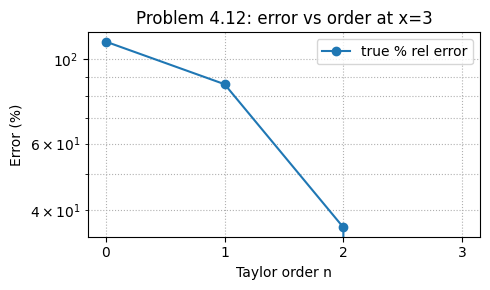

In [56]:
#Symbolic setup for f
x=sp.symbols('x', real=True)
f=25*x**3-6*x**2+7*x-88
x0=1
x_eval=3

#True value
true_f_at_3=sp.simplify(f.subs(x, x_eval))
print('True f(3) =', sp.N(true_f_at_3, 12))

orders=[0,1,2,3]
vals=[]
errs=[]
for n in orders:
	Tn=taylor_polynomial(f, x, x0, n)
	approx=sp.simplify(Tn.subs(x, x_eval))
	vals.append(float(sp.N(approx)))
	errs.append(truepercent_relative(true_f_at_3, approx))
	print(f'at n={n}: Tnth(3)={sp.N(approx, 12)}, evaluated%={errs[-1]:.6f}')

#Plot error vs order
plt.figure(figsize=(5,3))
plt.semilogy(orders, errs, 'o-', label='true % rel error')
plt.xticks(orders)
plt.xlabel('Taylor order n')
plt.ylabel('Error (%)')
plt.title('Problem 4.12: error vs order at x=3')
plt.grid(True, which='both', ls=':')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, 'p412_taylor_error.png'), dpi=150)
plt.show()


### Problem 4.15: First derivative at x=2 with h=0.25 to calculate forward difference, backward difference, and centered difference

In [57]:
#Define numerical callable for f
f_num=sp.lambdify(x, f, 'numpy')

def fScalerFunc(val):
	return float(sp.N(f.subs(x, val)))

#variables that were given in question
h=0.25
xPoint=2.0

#True derivative
fprime=sp.diff(f, x)
truefprime2=sp.N(fprime.subs(x, xPoint))

fwd=fwd_diff(fScalerFunc, xPoint, h)
bwd=bwd_diff(fScalerFunc, xPoint, h)
ctr=ctr_diff(fScalerFunc, xPoint, h)

print('True f\'(2) =', truefprime2)
for name, val in [('forward diff', fwd), ('backward diff', bwd), ('centered diff', ctr)]:
	print(f'\n{name:9s}: {val:.12f}\nabsolute error={abs(val-truefprime2):.12e}\nerror(%)={truepercent_relative(truefprime2, val):.12e}\n')


True f'(2) = 283.000000000000

forward diff: 320.562500000000
absolute error=3.756250000000e+1
error(%)=1.327296819788e+01


backward diff: 248.562500000000
absolute error=3.443750000000e+1
error(%)=1.216872791519e+01


centered diff: 284.562500000000
absolute error=1.562500000000e+0
error(%)=5.521201413428e-01



### Problem 4.16 — Second derivative at x=2 with centered O(h^2), h=0.2 and 0.1


In [58]:
#True second derivative
f2=sp.diff(f, x, 2)
truef2at2=sp.N(f2.subs(x, 2.0))

for h in [0.2, 0.1]:
	est=second_ctr(fScalerFunc, 2.0, h)
	print(f'at h({h}): f"(2) is {est:.12f}\nabsolute error={abs(est-truef2at2):.12e}\nerror(%)={truepercent_relative(truef2at2, est):.12e}\n')


at h(0.2): f"(2) is 288.000000000003
absolute error=3.069544618484e-12
error(%)=1.065814103640e-12

at h(0.1): f"(2) is 288.000000000001
absolute error=9.094947017729e-13
error(%)=3.157967714489e-13



### Problem 4.18: Taylor around pi/2, also finding the minimal n value with maximum error of <= 0.015

Minimal n meeting max error ≤ 0.015: 4


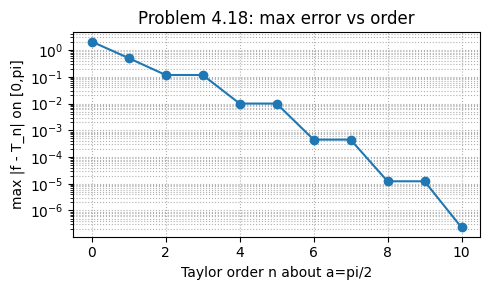

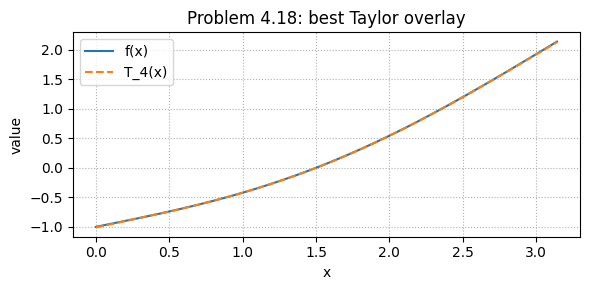

In [59]:
# Define function and Taylor scan
x = sp.symbols('x', real=True)
f18 = x - 1 - sp.Rational(1,2)*sp.sin(x)
a = sp.pi/2

# grid on [0, pi]
xg = np.linspace(0, float(sp.N(sp.pi)), 801)
fg = sp.lambdify(x, f18, 'numpy')(xg)

min_n = None
max_errs = []
ns = list(range(0, 11))
for n in ns:
	Tn = taylor_polynomial(f18, x, a, n)
	Tn_fun = sp.lambdify(x, Tn, 'numpy')
	approx_vals = Tn_fun(xg)
	err = np.max(np.abs(fg - approx_vals))
	max_errs.append(err)
	if min_n is None and err <= 0.015:
		min_n = n

print('Minimal n meeting max error ≤ 0.015:', min_n)

plt.figure(figsize=(5,3))
plt.semilogy(ns, max_errs, 'o-')
plt.xlabel('Taylor order n about a=pi/2')
plt.ylabel('max |f - T_n| on [0,pi]')
plt.title('Problem 4.18: max error vs order')
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, 'p418_max_error_vs_order.png'), dpi=150)
plt.show()

# Overlay plot for the selected n (if found)
if min_n is not None:
	Tbest = taylor_polynomial(f18, x, a, min_n)
	Tbest_fun = sp.lambdify(x, Tbest, 'numpy')
	plt.figure(figsize=(6,3))
	plt.plot(xg, fg, label='f(x)')
	plt.plot(xg, Tbest_fun(xg), '--', label=f'T_{min_n}(x)')
	plt.legend(); plt.xlabel('x'); plt.ylabel('value'); plt.title('Problem 4.18: best Taylor overlay')
	plt.grid(True, ls=':')
	plt.tight_layout()
	plt.savefig(os.path.join(FIG_DIR, 'p418_overlay.png'), dpi=150)
	plt.show()


### Problem 4.19: given values at h=0.25 to compare the forward, backward, and centered difference for f' and f''


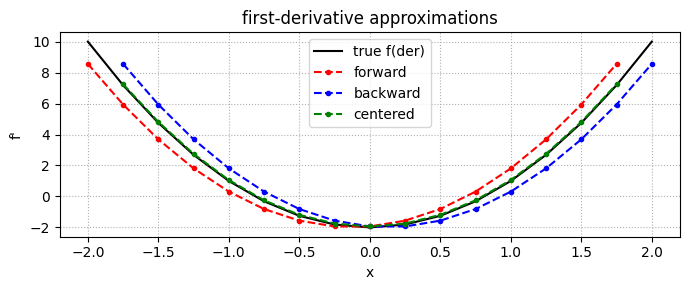

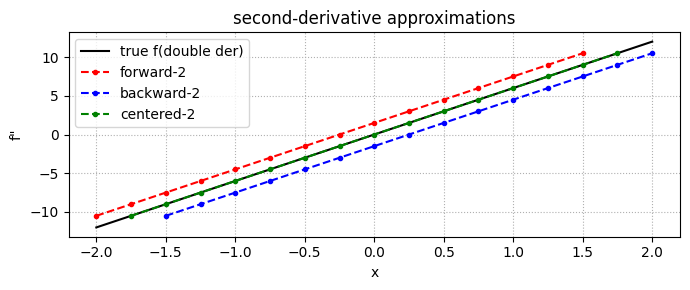

In [60]:
x=sp.symbols('x', real=True)

f19=x**3-2*x+4
f19p=sp.diff(f19, x)
f19pp=sp.diff(f19, x, 2)

f19fun=sp.lambdify(x, f19, 'numpy')
f19ptrue=sp.lambdify(x, f19p, 'numpy')
f19pptrue=sp.lambdify(x, f19pp, 'numpy')

#variables that were given in question
h=0.25
xg=np.arange(-2, 2+1e-12, h)

def apply_first_stencils(fcall, xg, h):
	xf=xg[:-1]
	xb=xg[1:]
	xc=xg[1:-1]
	fwd_vals=(fcall(xf+h)-fcall(xf))/h
	bwd_vals=(fcall(xb)-fcall(xb-h))/h
	ctr_vals=(fcall(xc+h)-fcall(xc-h))/(2*h)
	return xf, fwd_vals, xb, bwd_vals, xc, ctr_vals

def apply_second_stencils(fcall, xg, h):
	xf=xg[:-2]
	xb=xg[2:]
	xc=xg[1:-1]

	fwd2=(fcall(xf+2*h)-2*fcall(xf+h)+fcall(xf))/(h*h)
	bwd2=(fcall(xb)-2*fcall(xb-h)+fcall(xb-2*h))/(h*h)
	ctr2=(fcall(xc+h)-2*fcall(xc)+fcall(xc-h))/(h*h)
	
	return xf, fwd2, xb, bwd2, xc, ctr2

#comparison for First derivatives
xf, fwd1, xb, bwd1, xc, ctr1=apply_first_stencils(f19fun, xg, h)

plt.figure(figsize=(7,3))


plt.plot(xg, f19ptrue(xg), 'k-', label='true f(der)')
plt.plot(xf, fwd1, 'r.--', label='forward')
plt.plot(xb, bwd1, 'b.--', label='backward')
plt.plot(xc, ctr1, 'g.--', label='centered')
plt.legend(); plt.xlabel('x'); plt.ylabel('f\'')
plt.title('first-derivative approximations')
plt.grid(True, ls=':'); plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, 'p419_first_derivative.png'), dpi=150)

plt.show()

#comparison for Second derivatives
xf2, fwd2, xb2, bwd2, xc2, ctr2=apply_second_stencils(f19fun, xg, h)

plt.figure(figsize=(7,3))


plt.plot(xg, f19pptrue(xg), 'k-', label='true f(double der)')
plt.plot(xf2, fwd2, 'r.--', label='forward-2')
plt.plot(xb2, bwd2, 'b.--', label='backward-2')
plt.plot(xc2, ctr2, 'g.--', label='centered-2')

plt.legend(); plt.xlabel('x'); plt.ylabel('f\"')
plt.title('second-derivative approximations')
plt.grid(True, ls=':'); plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, 'p419_second_derivative.png'), dpi=150)

plt.show()


### Problem 4.99: Richardson extrapolation at x=2.067(first and second derivatives)


In [61]:
#variables that were given in question
x0=2.067

#First derivative via centered and Richardson
for h in [0.4, 0.2]:
	Dh=ctr_diff(fScalerFunc, x0, h)
	print(f'D(h={h}) is {Dh:.12f}')

Dh=ctr_diff(fScalerFunc, x0, 0.4)
Dh2=ctr_diff(fScalerFunc, x0, 0.2)
Drich=richardson(Dh, Dh2, p=2)

fprime=sp.diff(f, x)
truefprime=float(sp.N(fprime.subs(x, x0)))

print('\n')
print('Centered first-derivative at x=2.067 is as follows')
for name, val in [('at D(0.4)', Dh), ('at D(0.2)', Dh2), ('at Drich', Drich)]:
	print(f'{name:8s}: {val:.12f}\nabsolute error={abs(val-truefprime):.12e}\nerror(%)={truepercent_relative(truefprime, val):.12e}\n')

#Second derivative via three-point and Richardson at p =2
for h in [0.4, 0.2]:
	Sh=second_ctr(fScalerFunc, x0, h)
	print(f'S(h={h}) is{Sh:.12f}')

S04=second_ctr(fScalerFunc, x0, 0.4)
S02=second_ctr(fScalerFunc, x0, 0.2)
Srich=richardson(S04, S02, p=2)

true_f2=float(sp.N(sp.diff(f, x, 2).subs(x, x0)))

print('\n')
print('Second-derivative at x=2.067 is as follows')
for name, val in [('at S(0.4)', S04), ('at S(0.2)', S02), ('at Srich', Srich)]:
	print(f'{name:8s}: {val:.12f}\nabsolute error={abs(val-true_f2):.12e}\nerror(%)={truepercent_relative(true_f2, val):.12e}\n')


D(h=0.4) is 306.632675000000
D(h=0.2) is 303.632675000000


Centered first-derivative at x=2.067 is as follows
at D(0.4): 306.632675000000
absolute error=4.000000000000e+00
error(%)=1.321734343458e+00

at D(0.2): 303.632675000000
absolute error=1.000000000000e+00
error(%)=3.304335858645e-01

at Drich: 302.632675000000
absolute error=5.684341886081e-14
error(%)=1.878297472697e-14

S(h=0.4) is298.050000000000
S(h=0.2) is298.050000000001


Second-derivative at x=2.067 is as follows
at S(0.4): 298.050000000000
absolute error=1.705302565824e-13
error(%)=5.721531843061e-14

at S(0.2): 298.050000000001
absolute error=1.250555214938e-12
error(%)=4.195790018245e-13

at Srich: 298.050000000002
absolute error=1.705302565824e-12
error(%)=5.721531843061e-13



### Problem 4.99 (Another Equation)


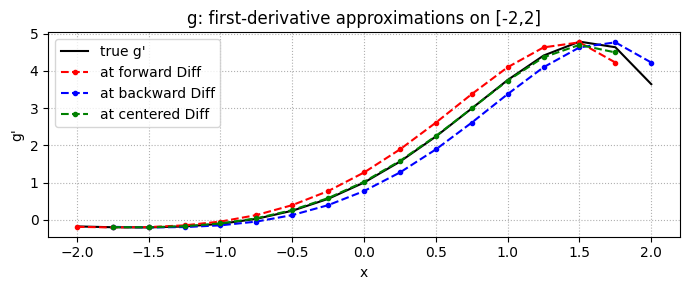

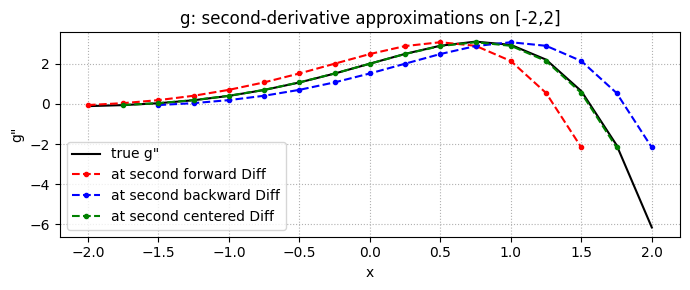

at D(h=0.4)=2.612713396266
at D(h=0.2)=3.043586619887


Richardson (first):
D(0.4)  : 2.612713396266
 absolute error=5.738396230568e-01
 error(%)=1.800816178413e+01
D(0.2)  : 3.043586619887
 absolute error=1.429663994354e-01
 error(%)=4.486553293432e+00
Drich   : 3.187211027761
 absolute error=6.580084384327e-04
 error(%)=2.064953680176e-02
g S(h=0.4)=-7.891669681880
g S(h=0.2)=-7.615770708052


Richardson (second):
S(0.4)  : -7.891669681880
 absolute error=3.684073301238e-01
 error(%)=-4.896909251580e+00
S(0.2)  : -7.615770708052
 absolute error=9.250835629618e-02
 error(%)=-1.229630869839e+00
Srich   : -7.523804383443
 absolute error=5.420316869742e-04
 error(%)=-7.204742592124e-03


In [62]:
x=sp.symbols('x', real=True)
g=sp.exp(x)*sp.sin(x)
gp=sp.diff(g, x)
gpp=sp.diff(g, x, 2)

gFun=sp.lambdify(x, g, 'numpy')
gpTrue=sp.lambdify(x, gp, 'numpy')
gppTrue=sp.lambdify(x, gpp, 'numpy')


#values given
h=0.25
xg=np.arange(-2, 2+1e-12, h)



#First derivative approximations
xf, g_fwd1, xb, g_bwd1, xc, g_ctr1=apply_first_stencils(gFun, xg, h)


plt.figure(figsize=(7,3))
plt.plot(xg, gpTrue(xg), 'k-', label='true g\'')
plt.plot(xf, g_fwd1, 'r.--', label='at forward Diff')
plt.plot(xb, g_bwd1, 'b.--', label='at backward Diff')
plt.plot(xc, g_ctr1, 'g.--', label='at centered Diff')

plt.legend(); plt.xlabel('x'); plt.ylabel('g\'')
plt.title('g: first-derivative approximations on [-2,2]')
plt.grid(True, ls=':'); plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, 'p499g_first.png'), dpi=150)

plt.show()

#Second derivative approximations
xf2, g_fwd2, xb2, g_bwd2, xc2, g_ctr2=apply_second_stencils(gFun, xg, h)


plt.figure(figsize=(7,3))
plt.plot(xg, gppTrue(xg), 'k-', label='true g\"')
plt.plot(xf2, g_fwd2, 'r.--', label='at second forward Diff')
plt.plot(xb2, g_bwd2, 'b.--', label='at second backward Diff')
plt.plot(xc2, g_ctr2, 'g.--', label='at second centered Diff')

plt.legend(); plt.xlabel('x'); plt.ylabel('g\"')

plt.title('g: second-derivative approximations on [-2,2]')
plt.grid(True, ls=':'); plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, 'p499g_second.png'), dpi=150)

plt.show()

#Richardson at x=2.067, also in given
x0=2.067
for h in [0.4, 0.2]:
	Dh=(float(sp.N(g.subs(x, x0+h)))-float(sp.N(g.subs(x, x0-h))))/(2*h)
	print(f'at D(h={h})={Dh:.12f}')
Dh04=(float(sp.N(g.subs(x, x0+0.4)))-float(sp.N(g.subs(x, x0-0.4))))/(2*0.4)
Dh02=(float(sp.N(g.subs(x, x0+0.2)))-float(sp.N(g.subs(x, x0-0.2))))/(2*0.2)
Drich=richardson(Dh04, Dh02, p=2)
true_gp=float(sp.N(gp.subs(x, x0)))
print('\n')
print('Richardson (first):')
for name, val in [('D(0.4)', Dh04), ('D(0.2)', Dh02), ('Drich', Drich)]:
	print(f'{name:8s}: {val:.12f}\n absolute error={abs(val-true_gp):.12e}\n error(%)={truepercent_relative(true_gp, val):.12e}')

#Second derivative at x0
for h in [0.4, 0.2]:
	Sh=(float(sp.N(g.subs(x, x0+h)))-2*float(sp.N(g.subs(x, x0)))+float(sp.N(g.subs(x, x0-h))))/(h*h)
	print(f'g S(h={h})={Sh:.12f}')
S04=(float(sp.N(g.subs(x, x0+0.4)))-2*float(sp.N(g.subs(x, x0)))+float(sp.N(g.subs(x, x0-0.4))))/(0.4*0.4)
S02=(float(sp.N(g.subs(x, x0+0.2)))-2*float(sp.N(g.subs(x, x0)))+float(sp.N(g.subs(x, x0-0.2))))/(0.2*0.2)
Srich=richardson(S04, S02, p=2)
true_gpp=float(sp.N(2*sp.exp(x0)*sp.cos(x0)))
print('\n')
print('Richardson (second):')
for name, val in [('S(0.4)', S04), ('S(0.2)', S02), ('Srich', Srich)]:
	print(f'{name:8s}: {val:.12f}\n absolute error={abs(val-true_gpp):.12e}\n error(%)={truepercent_relative(true_gpp, val):.12e}')


### ECEN 5080: errors and Richardson curve


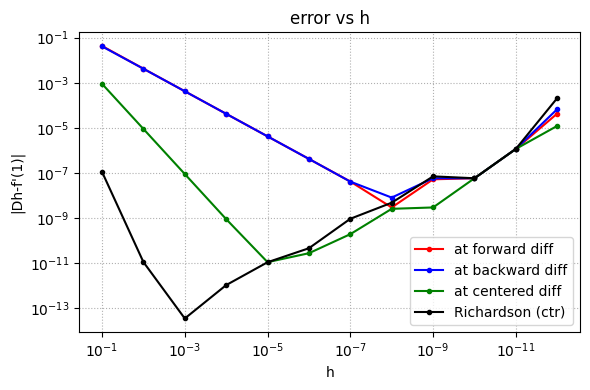

forward difference: h*=1.0e-08, 
 min error=2.970e-09
backward difference: h*=1.0e-08, 
 min error=8.132e-09
centered difference: h*=1.0e-05, 
 min error=1.114e-11
richardson: h*=1.0e-03, 
 min error=3.542e-14




In [65]:
#Setting up the scripts
x0=1.0
f=sp.sin(sp.Symbol('x'))
x=sp.Symbol('x', real=True)
true_val=float(sp.N(sp.cos(1)))

#Define scalar funstion f
fScalerFunc_5080=lambda t: float(sp.N(sp.sin(t)))

ks=range(1, 13)
hs=np.array([10.0**(-k) for k in ks])
err_fwd=[]
err_bwd=[]
err_ctr=[]
err_rich=[]

#Centered values for Richardson
Dctr_vals=[]


for h in hs:
	Dfwd=fwd_diff(fScalerFunc_5080, x0, h)
	Dbwd=bwd_diff(fScalerFunc_5080, x0, h)
	Dctr=ctr_diff(fScalerFunc_5080, x0, h)
	Dctr_half=ctr_diff(fScalerFunc_5080, x0, h/2)
	DRE=richardson(Dctr, Dctr_half, p=2)
	
	err_fwd.append(abs(Dfwd-true_val))
	err_bwd.append(abs(Dbwd-true_val))
	err_ctr.append(abs(Dctr-true_val))
	err_rich.append(abs(DRE-true_val))
	Dctr_vals.append(Dctr)

#Log-log plot

plt.figure(figsize=(6,4))

plt.loglog(hs, err_fwd, 'r.-', label='at forward diff')
plt.loglog(hs, err_bwd, 'b.-', label='at backward diff')
plt.loglog(hs, err_ctr, 'g.-', label='at centered diff')
plt.loglog(hs, err_rich, 'k.-', label='Richardson (ctr)')


plt.gca().invert_xaxis()

plt.xlabel('h')
plt.ylabel('|Dh-f\'(1)|')

plt.title('error vs h')
plt.grid(True, which='both', ls=':')


plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, 'ecen5080_loglog.png'), dpi=150)

plt.show()

#Report h that minimizes error for each
methods={'forward difference': err_fwd, 'backward difference': err_bwd, 'centered difference': err_ctr, 'richardson': err_rich}
for name, errs in methods.items():
	idx=int(np.nanargmin(errs))
	print(f'{name:10s}: h*={hs[idx]:.1e}, \n min error={errs[idx]:.3e}')

print('\n')
